# Introduction: Student Marks Prediction 

In this notebook we will implement Regression models to predict students marks using the below mentioned data. We will go through different regression models to find out best fit,after doing preprocessing/cleaning and then selecting the features.Comparing different regression models we will find out the best one.

## Dataset

We are using data on student grades collected from a Portuguese secondary (high) school. This data is from the UCI machine learning repository, a great collection of datasets for model testing. The data includes academic and personal characteristics of the students as well as final grades. The objective is to predict the final grade from the student information which makes this a supervised, regression task. We have a set of training data with known labels, and we want the model to learn a mapping from the features (explanatory variables) to the target (the label) in this case the final grade. It is a regression task because the final grade is a continuous value.

## Exploratory Data Analysis

In [130]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
 
# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (9, 9)

import seaborn as sns

# Scipy helper functions
from scipy.stats import percentileofscore

In [131]:
# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

## Read Data and examine

In [132]:
# Read in class scores
df = pd.read_csv('student-mat.csv',sep=';')#here it will be separated by colons

# Filter out grades that were 0
df = df[~df['G3'].isin([0, 1])]

df = df.rename(columns={'G3': 'Grade'})

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [133]:
df.shape

(357, 33)

In [134]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,16.655462,2.795518,2.546218,1.431373,2.042017,0.271709,3.955182,3.246499,3.098039,1.495798,2.330532,3.549020,6.316527,11.268908,11.358543,11.523810
std,1.268262,1.093999,1.084217,0.686075,0.831895,0.671750,0.885721,1.011601,1.090779,0.919886,1.294974,1.402638,8.187623,3.240450,3.147188,3.227797
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,5.000000,4.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,2.000000,9.000000,9.000000,9.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,14.000000,14.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [135]:
# Print the value counts for categorical columns
for col in df.columns:
    if df[col].dtype == 'object':
        print('\nColumn Name:', col,)
        print(df[col].value_counts())


Column Name: school
GP    315
MS     42
Name: school, dtype: int64

Column Name: sex
F    185
M    172
Name: sex, dtype: int64

Column Name: address
U    279
R     78
Name: address, dtype: int64

Column Name: famsize
GT3    250
LE3    107
Name: famsize, dtype: int64

Column Name: Pstatus
T    318
A     39
Name: Pstatus, dtype: int64

Column Name: Mjob
other       127
services     94
teacher      54
at_home      50
health       32
Name: Mjob, dtype: int64

Column Name: Fjob
other       196
services    100
teacher      26
health       18
at_home      17
Name: Fjob, dtype: int64

Column Name: reason
course        126
reputation     99
home           97
other          35
Name: reason, dtype: int64

Column Name: guardian
mother    248
father     82
other      27
Name: guardian, dtype: int64

Column Name: schoolsup
no     307
yes     50
Name: schoolsup, dtype: int64

Column Name: famsup
yes    219
no     138
Name: famsup, dtype: int64

Column Name: paid
no     184
yes    173
Name: paid, dty

In [136]:
df.Grade.describe()

count    357.000000
mean      11.523810
std        3.227797
min        4.000000
25%        9.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: Grade, dtype: float64

In [137]:
df.Grade.value_counts()

10    56
11    47
15    33
8     32
13    31
12    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
20     1
4      1
Name: Grade, dtype: int64

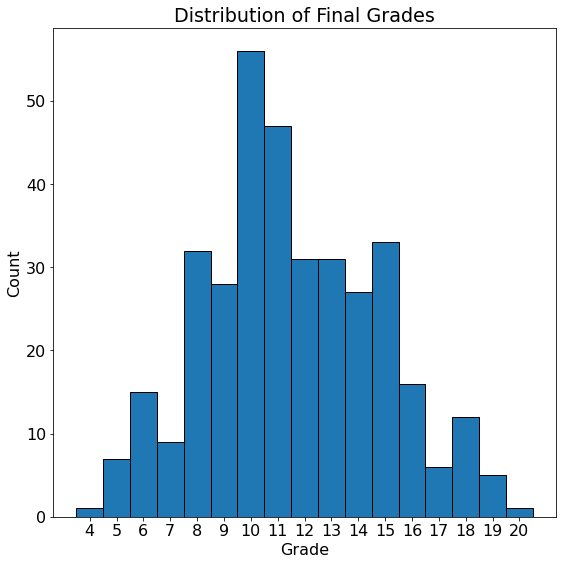

In [138]:
# Bar plot of grades
plt.bar(df['Grade'].value_counts().index, 
        df['Grade'].value_counts().values,
         fill = 'navy', edgecolor = 'k', width = 1)
plt.xlabel('Grade'); plt.ylabel('Count'); plt.title('Distribution of Final Grades');
plt.xticks(list(range(4, 21)));

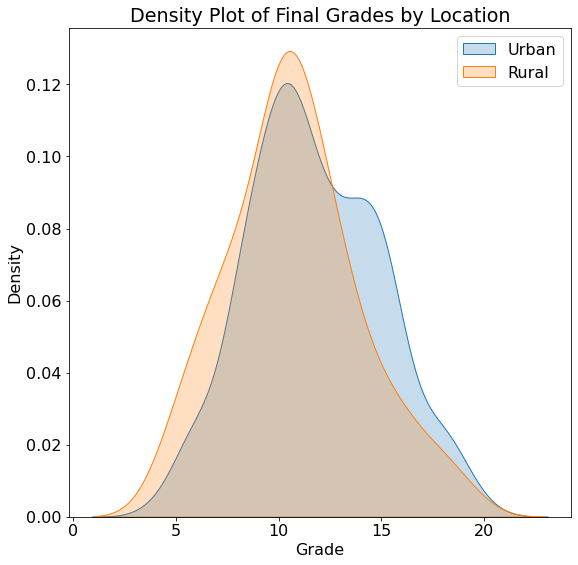

In [139]:
sns.kdeplot(df.loc[df['address'] == 'U', 'Grade'],label = 'Urban', shade = True)
sns.kdeplot(df.loc[df['address'] == 'R', 'Grade'], label = 'Rural', shade = True)
plt.xlabel('Grade'); plt.ylabel('Density'); plt.title('Density Plot of Final Grades by Location');plt.legend()

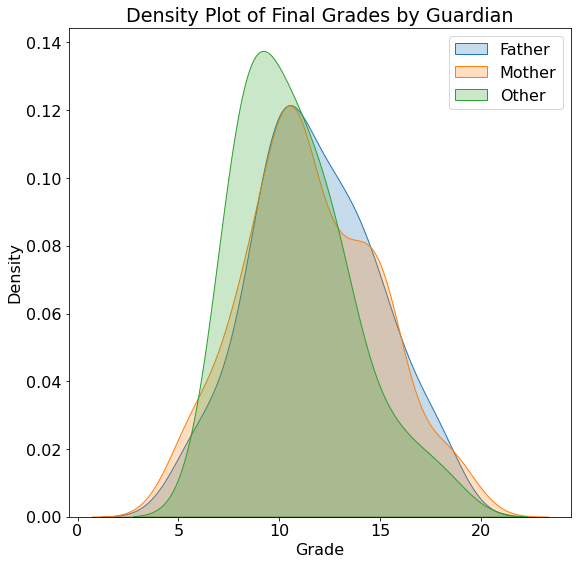

In [140]:
# Grade distribution by Guardian
sns.kdeplot(df.loc[df['guardian'] == 'father', 'Grade'], label = 'Father', shade = True)
sns.kdeplot(df.loc[df['guardian'] == 'mother', 'Grade'], label = 'Mother', shade = True)
sns.kdeplot(df.loc[df['guardian'] == 'other', 'Grade'], label = 'Other', shade = True)
plt.xlabel('Grade'); plt.ylabel('Density'); plt.title('Density Plot of Final Grades by Guardian');plt.legend()

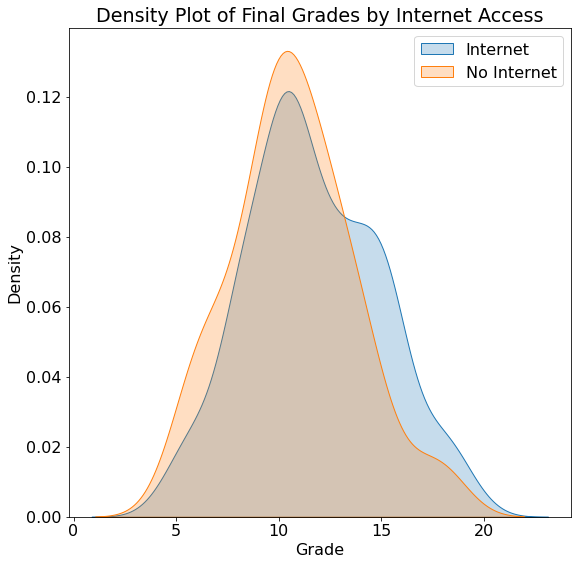

In [141]:
# Grade distribution by internet
sns.kdeplot(df.loc[df['internet'] == 'yes', 'Grade'], label = 'Internet', shade = True)
sns.kdeplot(df.loc[df['internet'] == 'no', 'Grade'], label = 'No Internet', shade = True)
plt.xlabel('Grade'); plt.ylabel('Density'); plt.title('Density Plot of Final Grades by Internet Access');plt.legend()

In [142]:
# Look at distribution of schools by address
schools = df.groupby(['school'])['address'].value_counts()
schools

school  address
GP      U          259
        R           56
MS      R           22
        U           20
Name: address, dtype: int64

## Grade Percentile

In [143]:
# Calculate percentile for grades
df['percentile'] = df['Grade'].apply(lambda x: percentileofscore(df['Grade'], x))

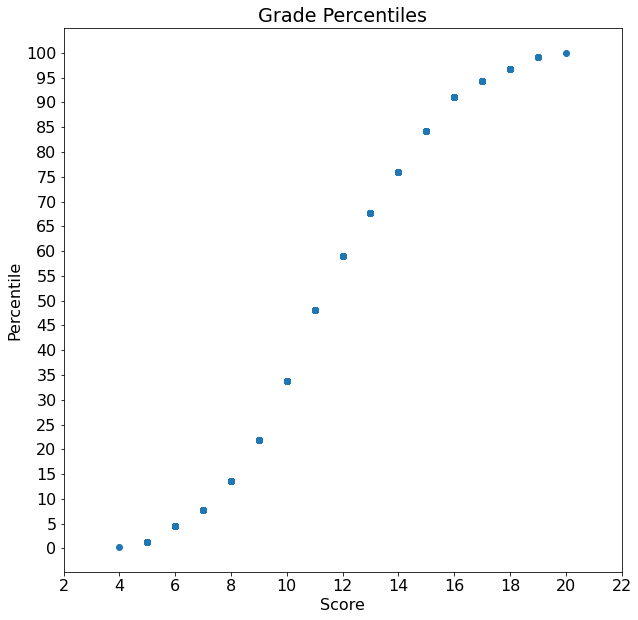

In [144]:
# Plot percentiles for grades
plt.figure(figsize = (10, 10))
plt.plot(df['Grade'], df['percentile'], 'o')
plt.xticks(range(2, 24, 2));plt.yticks(range(0,105,5))
plt.xlabel('Score'); plt.ylabel('Percentile'); plt.title('Grade Percentiles');

In [145]:
print('50th percentile score:', np.min(df.loc[df['percentile'] > 50, 'Grade']))
print('Minimum Score needed for 90th percentile:', np.min(df.loc[df['percentile'] > 90, 'Grade']))

50th percentile score: 12
Minimum Score needed for 90th percentile: 16


## Variable Corelation with Final Grade

### Numerical Corelation

In [146]:
# Correlations of numerical values
df.corr()['Grade'].sort_values()

failures     -0.293831
absences     -0.213129
Walc         -0.190054
goout        -0.177383
Dalc         -0.140690
age          -0.140372
traveltime   -0.099785
health       -0.081691
freetime     -0.021589
famrel        0.037711
studytime     0.126728
Fedu          0.158811
Medu          0.190308
G1            0.891805
G2            0.965583
percentile    0.983823
Grade         1.000000
Name: Grade, dtype: float64

### Categorical corelation with one-hot encoding

In [147]:
# Select only categorical variables
category_df = df.select_dtypes('object')
# One hot encode the variables
dummy_df = pd.get_dummies(category_df)
# Put the grade back in the dataframe
dummy_df['Grade'] = df['Grade']
dummy_df.head()

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,Grade
0,1,0,1,0,0,1,1,0,1,0,...,0,0,1,0,1,1,0,1,0,6
1,1,0,1,0,0,1,1,0,0,1,...,0,1,0,0,1,0,1,1,0,6
2,1,0,1,0,0,1,0,1,0,1,...,0,0,1,0,1,0,1,1,0,10
3,1,0,1,0,0,1,1,0,0,1,...,1,0,1,0,1,0,1,0,1,15
4,1,0,1,0,0,1,1,0,0,1,...,0,0,1,0,1,1,0,1,0,10


In [148]:
# Correlations in one-hot encoded dataframe
dummy_df.corr()['Grade'].sort_values()

schoolsup_yes       -0.238365
Mjob_other          -0.142541
address_R           -0.130090
higher_no           -0.113419
internet_no         -0.111624
sex_F               -0.102448
Mjob_at_home        -0.090624
school_MS           -0.083615
Fjob_other          -0.081502
guardian_other      -0.069491
famsup_yes          -0.067305
activities_no       -0.058600
reason_course       -0.050918
romantic_yes        -0.049944
famsize_GT3         -0.039744
paid_yes            -0.028899
Pstatus_T           -0.026665
nursery_no          -0.026541
Fjob_services       -0.018154
reason_other        -0.003897
reason_home          0.000372
Fjob_health          0.006241
guardian_mother      0.007728
nursery_yes          0.026541
Pstatus_A            0.026665
paid_no              0.028899
Fjob_at_home         0.028954
guardian_father      0.035220
famsize_LE3          0.039744
Mjob_teacher         0.045390
romantic_no          0.049944
reason_reputation    0.056573
activities_yes       0.058600
famsup_no 

### Selecting the most correlated columns

In [149]:
# First we create a temporary df and exclude the object columns
# Then we drop the G1,G2,percentile
# Then we concat the dummy_df and df_temp
# Finally we find out correlation with the grade column
df_temp=df.select_dtypes(exclude=object)
df_temp.drop(columns=['G1','G2','percentile','Grade'],inplace=True)
Features_mat=pd.concat([df_temp,dummy_df],axis=1)
Most_correlated=Features_mat.corr()['Grade'].abs().sort_values(ascending=False)
Most_correlated

/home/akash/miniconda3/envs/work/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Grade                1.000000
failures             0.293831
schoolsup_yes        0.238365
schoolsup_no         0.238365
absences             0.213129
Medu                 0.190308
Walc                 0.190054
goout                0.177383
Fedu                 0.158811
Fjob_teacher         0.158455
Mjob_other           0.142541
Dalc                 0.140690
age                  0.140372
Mjob_health          0.134581
address_R            0.130090
address_U            0.130090
studytime            0.126728
higher_yes           0.113419
higher_no            0.113419
internet_no          0.111624
internet_yes         0.111624
sex_M                0.102448
sex_F                0.102448
Mjob_services        0.102134
traveltime           0.099785
Mjob_at_home         0.090624
school_MS            0.083615
school_GP            0.083615
health               0.081691
Fjob_other           0.081502
guardian_other       0.069491
famsup_yes           0.067305
famsup_no            0.067305
activities

In [150]:
# Now finally we will check the correlation between feature matrix with the target variable
# Now we can see that top 23 features has correlation greater than 1
# We select those columns only as our feature
Most_correlated_new=Most_correlated[1:24]
# Now we get the indexes of the Most_correlated_new and take those from our data frame
X=Features_mat.loc[:,Most_correlated_new.index]
y=Features_mat['Grade']

# Splitting the model into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

# Building and comparing models

In [151]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
mae=np.sqrt(mean_absolute_error(y_test,y_pred))
mse=np.sqrt(mean_squared_error(y_test,y_pred))
med=np.sqrt(median_absolute_error(y_test,y_pred))
print('Root Mean Square Error:%.3f\nRoot mean absolute error:%.3f\nRoot Median Absolute Error:%.3f'%(mse,mae,med))

Root Mean Square Error:2.891
Root mean absolute error:1.560
Root Median Absolute Error:1.507


In [152]:
svr=SVR()
svr.fit(X_train,y_train)
y_pred1=svr.predict(X_test)
mae1=np.sqrt(mean_absolute_error(y_test,y_pred1))
mse1=np.sqrt(mean_squared_error(y_test,y_pred1))
med1=np.sqrt(median_absolute_error(y_test,y_pred1))
print('Root Mean Square Error:%.3f\nRoot mean absolute error:%.3f\nRoot Median Absolute Error:%.3f'%(mse1,mae1,med1))

Root Mean Square Error:3.037
Root mean absolute error:1.584
Root Median Absolute Error:1.508


In [153]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred2=rf.predict(X_test)
mae2=np.sqrt(mean_absolute_error(y_test,y_pred2))
mse2=np.sqrt(mean_squared_error(y_test,y_pred2))
med2=np.sqrt(median_absolute_error(y_test,y_pred2))
print('Root Mean Square Error:%.3f\nRoot mean absolute error:%.3f\nRoot Median Absolute Error:%.3f'%(mse2,mae2,med2))

Root Mean Square Error:3.074
Root mean absolute error:1.601
Root Median Absolute Error:1.525


In [154]:
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)
y_pred3=gbr.predict(X_test)
mae3=np.sqrt(mean_absolute_error(y_test,y_pred3))
mse3=np.sqrt(mean_squared_error(y_test,y_pred3))
med3=np.sqrt(median_absolute_error(y_test,y_pred3))
print('Root Mean Square Error:%.3f\nRoot mean absolute error:%.3f\nRoot Median Absolute Error:%.3f'%(mse3,mae3,med3))

Root Mean Square Error:3.099
Root mean absolute error:1.598
Root Median Absolute Error:1.563


# Some points

In [155]:
X_train.columns

Index(['failures', 'schoolsup_yes', 'schoolsup_no', 'absences', 'Medu', 'Walc',
       'goout', 'Fedu', 'Fjob_teacher', 'Mjob_other', 'Dalc', 'age',
       'Mjob_health', 'address_R', 'address_U', 'studytime', 'higher_yes',
       'higher_no', 'internet_no', 'internet_yes', 'sex_M', 'sex_F',
       'Mjob_services'],
      dtype='object')

In [157]:
lr.coef_

array([-0.96994891, -1.05612474,  1.05612474, -0.04390475,  0.32538195,
       -0.20953447, -0.27895658,  0.00738182,  1.58409611, -0.28648497,
       -0.0850584 , -0.08749489,  0.61575898, -0.32867287,  0.32867287,
        0.60422559, -0.19411857,  0.19411857, -0.02982908,  0.02982908,
        0.38196691, -0.38196691,  0.82980463])

Here we see the following points-
- failures has the most(negative) effect on the student grades
- schoolsup_yes--> which is extra support after school has negative effect on the grades. It is kind of confusing, which actually should increase the marks are fuelling in lowering them
- schoolsup_no--> just the opposite effect, means students who don't have support other than school are performing better
- Fjob_teacher--> Father's profession-->It seems if your father is a teacher then your grades goes up, which is usually the thing.
- Mjob_health--> If your mother's profession is related to health service then you also buckle up the grades it seems.
- studytime--> The number of hours you study in a week, which is reasonable to be one of the reason for student's grade.
- Mjob_services--> If your mother's profession is related to civil services (example-Police,Administrative) then it seems the grades goes higher.
- other columns don't play that much significant role

# Conclusion

* Judging from the metrics, the Linear Regression model runs the best, followed by SVR,RandoForestRegressor,GradientBoostingRegressor.
* Due to lack of data it seems the model is behaving bad, and some sign of overfitting is also there.